In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_t10_h20_tri.txt', dtype=int)
e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_t10_h20_tri_err.txt', dtype=int)

# s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_n400_noNT.txt', dtype=int)
# e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f4_n400_noNT_err.txt', dtype=int)

log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [3]:
# wavelengths
line = 1403.
wav = np.arange(line-10,line+10,0.01)

In [29]:
spec = s[15,:]
error = e[15,:]
res = fit2gauss(wav,spec,error,verbose=True)

est params =  [210348623.0863339, 1403.3802427827775, 0.1, 2440691254.334047, 1402.9951579904653, 0.1]
single peak found
only one peak still
new init params =  [2644316711.0000005, 1403.0299999999909, 0.1, 1322158355.5000002, 1402.7799999999909, 0.1]
a2g = [1.81771224e+09 1.40304024e+03 1.00746314e-01 8.87023384e+08
 1.40299710e+03 1.04610631e-01]
a1g[0] = 2652942981.647779
chi2g =  nan
a2g =  [1.81771224e+09 1.40304024e+03 1.00746314e-01 8.87023384e+08
 1.40299710e+03 1.04610631e-01]
chi1g =  nan
chi2g =  nan


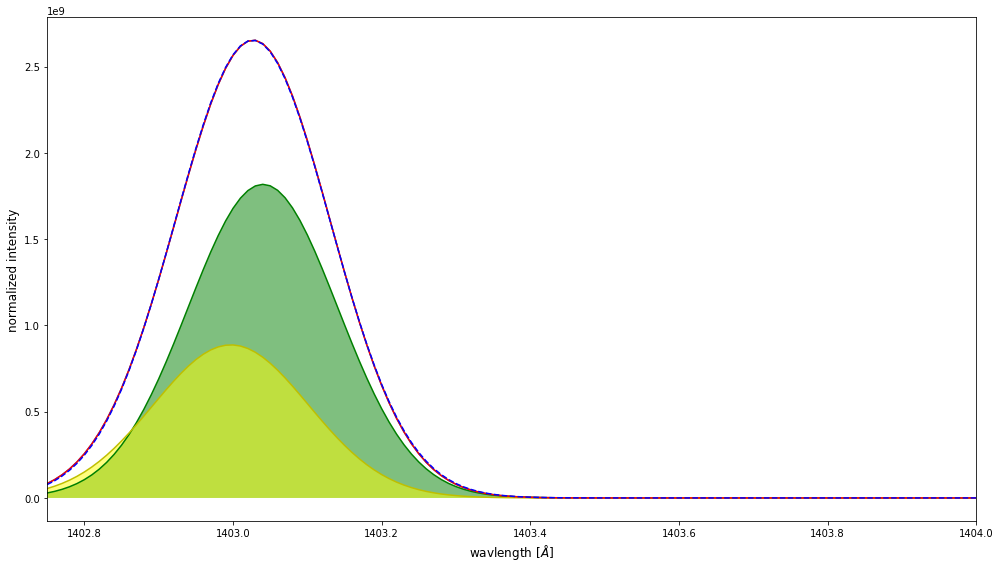

In [30]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [31]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  8.603902822419828 ----- "blue" velocity =  -0.6190896746552046


In [32]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  5.646434633049761


In [33]:
sig = a2g[2]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  21.545865837427854


test for peak finding.

In [34]:
from scipy.signal import find_peaks

In [35]:
spec_sm = savgol_filter(spec, 23, 1)
peaks, _ = find_peaks(spec_sm)

(1402.75, 1404)

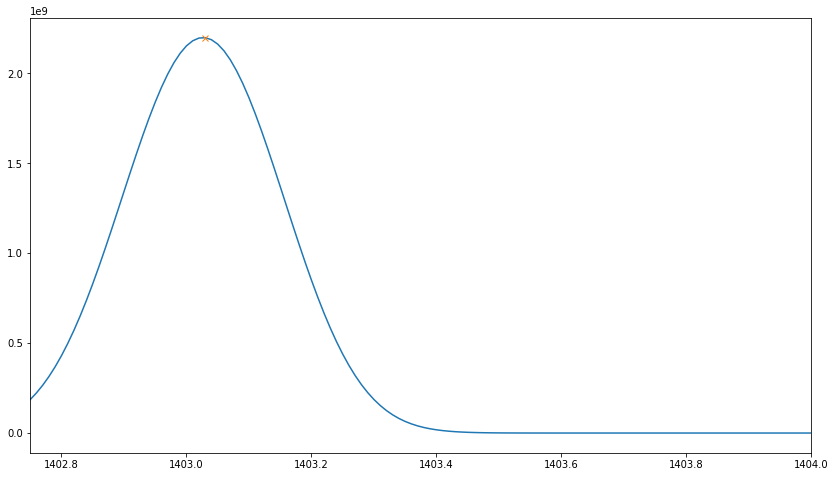

In [36]:
#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec_sm)
ax1.plot(wav[peaks], spec_sm[peaks], "x")
plt.xlim(1402.75,1404)

In [37]:
pos_peaks = wav[peaks]
spec_peaks = spec_sm[peaks]
iis = np.where(spec_peaks>0.05*np.max(spec))
iis = iis[0]

In [38]:
iis

array([0])

In [39]:
amp_peaks = spec_peaks[iis]

In [40]:
pos = pos_peaks[iis]

In [41]:
print('pos =', pos, 'amps = ', amp_peaks)

pos = [1403.03] amps =  [2.19817881e+09]


In [42]:
error[error==0]=1

In [43]:
np.where(error==0)

(array([], dtype=int64),)

In [44]:
y2g = y2a+y2b
X2two = np.sum(((y2g - spec) / error)**2)

In [45]:
X2two

46709.71008036165

In [46]:
chi2g = X2two/(len(spec)-6)

In [47]:
chi2g

23.42513043147525

In [48]:
X2one = np.sum(((y1g - spec) / error)**2)
chi1g = X2one/(len(spec)-3)
chi1g

5785.4951845515825

(1402, 1404)

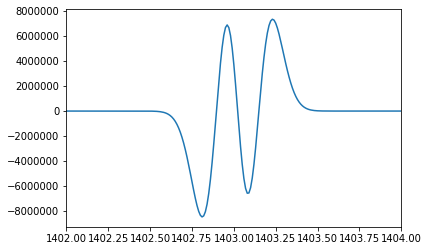

In [49]:
plt.plot(wav,y1g-y2g)
plt.xlim(1402,1404)

(1402, 1404)

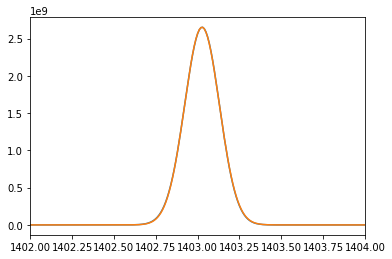

In [50]:
plt.plot(wav, spec)
plt.plot(wav,y1g)
plt.xlim(1402,1404)